# Diabetes Prediction Analysis

####                       Project by: Mayur Rajput

## Project Goal :

The objective of this project is to diagnostically predict whether a patient has diabetes
based on certain diagnostic measurements included in the dataset.

## Project Description :

In this project, we aim to create a tool that can predict whether a person is likely to have diabetes based on some information about them. This tool can be helpful for early detection and better management of diabetes. We will use a dataset that contains information about people, such as their number of pregnancies, blood glucose levels, blood pressure, and more.

This project will involve data preprocessing,Logistic Regression, exploratory data analysis (EDA), model building, and evaluation.

**Here's a step-by-step breakdown of what we'll do:**

**Data Collection:** We will gather data from a dataset that has information about different individuals, including whether they have diabetes or not.

**Data Examination:** We will look at the data to understand it better. We'll check if there are any missing values and explore the information it contains.

**Data Preparation:** Data is often messy, so we will clean it up. This means dealing with missing values and organizing the data in a way that a computer can understand.

**Building a Model:** We will use a computer program (a model) to learn from the data. It will learn the patterns that suggest whether a person has diabetes or not.

**Testing the Model:** To make sure our model works well, we will test it using a different set of data that it hasn't seen before. This will help us see how accurate our model is in making predictions.

**Deploying model:** Once we are satisfied with our model's accuracy, it can be used to predict whether a person is at risk of diabetes based on their information.

The goal of this project is to help identify individuals at risk of diabetes early, which can lead to better health outcomes. This prediction can be a valuable tool for healthcare professionals and individuals to make informed decisions about their health.

## Information about dataset attributes :

**Pregnancies:** To express the Number of pregnancies

**Glucose:** To express the Glucose level in blood

**BloodPressure:** To express the Blood pressure measurement

**SkinThickness:** To express the thickness of the skin

**Insulin:** To express the Insulin level in blood

**BMI:** To express the Body mass index

**DiabetesPedigreeFunction:** To express the Diabetes percentage

**Age:** To express the age

**Outcome:** To express the final result 1 is for Diabetic person and 0 is for Non-diabetic person.

## 1. Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 2. Loading Dataset

In [2]:
data= pd.read_csv('Diabetes.csv')

## 3. Data Exploration

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px solid black !important;
}
</style>

In [4]:
data.shape

(768, 9)

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Having values of 0 in columns like "Glucose," "BloodPressure," "SkinThickness," "Insulin," "BMI," "DiabetesPedigreeFunction," and "Age" may not make sense from a medical perspective. It's highly unusual for these health-related measurements to be exactly 0 so values in these columns is more likely indicative of missing or unknown data rather than valid measurements. So replacing these 0 values with NaN (Not a Number) to clearly indicate that the data is missing or unknown.

In [7]:
# Replace 0 values with NaN in selective columns
columns_to_replace = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
data[columns_to_replace] = data[columns_to_replace].replace(0, np.nan)

In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


### Identifying Missing Values in Dataset :

In [11]:
print(data.isnull().mean()*100)

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64


### Distribution of Outcome Variable :

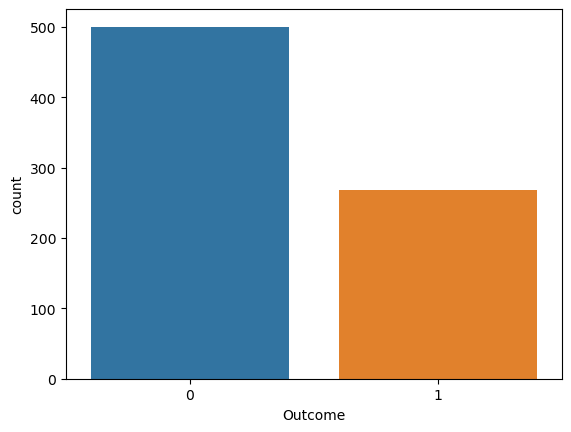

In [12]:
sns.countplot(x='Outcome', data=data)
plt.show()

## 4. Data Preprocessing

### 4.1 - Handling Missing Values in Dataset :

In [13]:
# Insulin column is removed as it is having larger percentage of  missing values.
data = data.drop('Insulin',axis=1)

In [14]:
# For rest of the columns missing values are replace with mean
data.fillna(data.mean(),inplace=True)

In [15]:
data.isnull().mean()*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [16]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,43.1,2.288,33,1


### 4.2 - Defining Features and and Target variable

In [17]:
# Spliting data into features (x) and target variable (y)
x = data.drop('Outcome',axis=1)
y = data['Outcome']

In [18]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness   BMI  \
0              6    148.0           72.0       35.00000  33.6   
1              1     85.0           66.0       29.00000  26.6   
2              8    183.0           64.0       29.15342  23.3   
3              1     89.0           66.0       23.00000  28.1   
4              0    137.0           40.0       35.00000  43.1   
..           ...      ...            ...            ...   ...   
763           10    101.0           76.0       48.00000  32.9   
764            2    122.0           70.0       27.00000  36.8   
765            5    121.0           72.0       23.00000  26.2   
766            1    126.0           60.0       29.15342  30.1   
767            1     93.0           70.0       31.00000  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33

In [19]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### 4.3 - Data Standardization

In [20]:
# Create an instance of StandarScaler
scaler = StandardScaler()

In [21]:
#standardize the data
scaler.fit(x)
standaradized_data= scaler.transform(x)
print(standaradized_data)

[[ 0.63994726  0.86510807 -0.03351824 ...  0.16629174  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20616153 -0.52985903 ... -0.85253118 -0.36506078
  -0.19067191]
 [ 1.23388019  2.0158134  -0.69530596 ... -1.33283341  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.0225789  -0.03351824 ... -0.91074963 -0.68519336
  -0.27575966]
 [-0.84488505  0.14180757 -1.02619983 ... -0.34311972 -0.37110101
   1.17073215]
 [-0.84488505 -0.94314317 -0.19896517 ... -0.29945588 -0.47378505
  -0.87137393]]


In [22]:
x = standaradized_data
y = data['Outcome']

In [23]:
print(x)

[[ 0.63994726  0.86510807 -0.03351824 ...  0.16629174  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20616153 -0.52985903 ... -0.85253118 -0.36506078
  -0.19067191]
 [ 1.23388019  2.0158134  -0.69530596 ... -1.33283341  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.0225789  -0.03351824 ... -0.91074963 -0.68519336
  -0.27575966]
 [-0.84488505  0.14180757 -1.02619983 ... -0.34311972 -0.37110101
   1.17073215]
 [-0.84488505 -0.94314317 -0.19896517 ... -0.29945588 -0.47378505
  -0.87137393]]


In [24]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### 4.4 - Spliting data into training and testing Model

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, stratify=y, random_state=2)
print(x.shape, x_train.shape, x_test.shape )

(768, 7) (614, 7) (154, 7)


## 5. Model Building

For a binary classification task like diabetes prediction (0 for non-diabetic and 1 for diabetic), we'll use Logistic Regression. It's a straightforward algorithm for this purpose

In [26]:
# Create an instance of the model
model = LogisticRegression()

### 5.1 - Model Training

In [27]:
# Fit the model to the training data
model.fit(x_train, y_train)

LogisticRegression()

## 6. Model Evaluation

In [28]:
## Accuracy score of training data
x_train_prediction = model.predict(x_train)

accuracy_train = accuracy_score(x_train_prediction, y_train)
print(f"Accuracy score of training data: {accuracy_train}")

Accuracy score of training data: 0.7801302931596091


In [29]:
## Accuracy of test data
x_test_prediction = model.predict(x_test)

accuracy_test = accuracy_score(x_test_prediction, y_test)
print(f"Accuracy score of test data: {accuracy_test}")

Accuracy score of test data: 0.7272727272727273


## 7. Model Deployement

In [30]:
# Create an empty list to store user input
input_data = []

# Define the list of features (replace with your actual feature names)
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Loop through each feature to get user input
for feature in features:
    while True:
        try:
            value = float(input(f"Enter {feature}: "))
            input_data.append(value)
            break  # Exit the loop if input is valid
        except ValueError:
            print("Invalid input. Please enter a numeric value.")

# Convert the list to a NumPy array
input_data_as_np_array = np.array(input_data)

# Now, user_input_as_np_array contains the input data as a NumPy array
print("User input data as a NumPy array:")
print(input_data_as_np_array)

Enter Pregnancies: 6
Enter Glucose: 148
Enter BloodPressure: 72
Enter SkinThickness: 35
Enter BMI: 33.6
Enter DiabetesPedigreeFunction: 0.627
Enter Age: 50
User input data as a NumPy array:
[  6.    148.     72.     35.     33.6     0.627  50.   ]


In [31]:
# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_np_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.63994726  0.86510807 -0.03351824  0.66550212  0.16629174  0.46849198
   1.4259954 ]]
[1]
The person is diabetic


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
